# Python code for contact pairs txt. file

Creation of .txt files containing all contact pairs per cell derived from Hi-C files using Juicer .Preparation for Circuit Topology.

### Import packages 

In [1]:
import numpy as np
from PIL import Image
import os
import csv
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt


### Import data


In [2]:
# Set the path to the directory containing hic files
hic_directory = "/media/msbb/ssd2/Yasmine_copy/BULK_HIC/hic/"

# Create a new directory called "pairs"
pairs_directory = "/media/msbb/ssd2/Yasmine_copy/BULK_HIC/06-pairs"
os.makedirs(pairs_directory, exist_ok=True)


In [13]:
#Run juicer on all Hi-C files

hic_files = os.listdir(hic_directory)
hic_files = [hic_file for hic_file in hic_files if hic_file.endswith(".hic")]
hic_files_names = [hic_file[:-4] for hic_file in hic_files]
hic_files_paths = [f"{hic_directory}/{hic_file}" for hic_file in hic_files]
discretisation_steps = [10e3,5e4,10e4,5e5,10e5]


for step in discretisation_steps:
    step=int(step)
    # Loop through each hic file in the directory
    for hic_file_name,hic_file_path in zip(hic_files_names[:1],hic_files_paths[:1]):

        # Loop through each chromosome, including X and Y
        all_pair_df = pd.DataFrame(columns=['#chrA', 'pos_A', 'chrB', 'pos_B', 'pairs_of_contacts'])
        if not os.path.isdir(f'{pairs_directory}/{step}/{hic_file_name}'): 
            os.makedirs(f'{pairs_directory}/{step}/{hic_file_name}')

        for chr in range(1, 25):
            if chr == 23:
                chr_name = "X"
            elif chr == 24:
                chr_name = "Y"
            else:
                chr_name = str(chr)

            # Construct the new file name without the hic extension and with the chromosome name
            new_file_name = f'{pairs_directory}/{step}/{hic_file_name}/{hic_file_name}_{chr_name}.pairs.txt'

            # Run juicer command using double quotes to wrap the entire command
            os.system(f'java -jar juicer_tools_1.22.01.jar dump observed NONE {hic_file_path} chr{chr_name} chr{chr_name} BP {step} {new_file_name}')
            print(f"Processed: {hic_file_name} chromosome {chr_name}")

            # Read chrom file and add it to DataFrame
            COLUMN_NAMES= ['pos_A','pos_B', 'pairs_of_contacts']
            data= pd.read_csv(new_file_name, sep = '\t', names = COLUMN_NAMES)

            # Add new colums encoding chrom numbers
            data['#chrA'] = ['chr'+str(chr_name)]*len(data)
            data['chrB'] = ['chr'+str(chr_name)]*len(data)

            #Swap the colums to have CT code readable format
            data = data.reindex(columns=['#chrA', 'pos_A', 'chrB', 'pos_B', 'pairs_of_contacts'])

            # Add one more chrom to all chroms data frame
            all_pair_df = pd.concat([all_pair_df, data], ignore_index=True, sort=False)

        # Save df as txt
        all_pair_df.to_csv(f'{new_file_name[:-12]}_all.pairs.txt', sep='\t', index=False)
    # Concatenate chr1 to chr22, X, and Y using numpy (outside the hic_file loop)
    all_chromosomes_files = [os.path.join(pairs_directory, f'{file_name_without_hic}_{chr}.txt') for chr in range(1, 25)]

WARN [2024-07-22T20:52:26,410]  [Globals.java:138] [main]  Development mode is enabled
Processed: SRR20102070_1 chromosome 1
WARN [2024-07-22T20:52:27,268]  [Globals.java:138] [main]  Development mode is enabled
Processed: SRR20102070_1 chromosome 2
WARN [2024-07-22T20:52:28,212]  [Globals.java:138] [main]  Development mode is enabled
Processed: SRR20102070_1 chromosome 3
WARN [2024-07-22T20:52:29,075]  [Globals.java:138] [main]  Development mode is enabled
Processed: SRR20102070_1 chromosome 4
WARN [2024-07-22T20:52:30,065]  [Globals.java:138] [main]  Development mode is enabled
Processed: SRR20102070_1 chromosome 5
WARN [2024-07-22T20:52:31,025]  [Globals.java:138] [main]  Development mode is enabled
Processed: SRR20102070_1 chromosome 6
WARN [2024-07-22T20:52:32,047]  [Globals.java:138] [main]  Development mode is enabled
Processed: SRR20102070_1 chromosome 7
WARN [2024-07-22T20:52:32,948]  [Globals.java:138] [main]  Development mode is enabled
Processed: SRR20102070_1 chromosome 8


## Plot histogram

In [11]:
plt.rcParams.update({'font.size': 20})

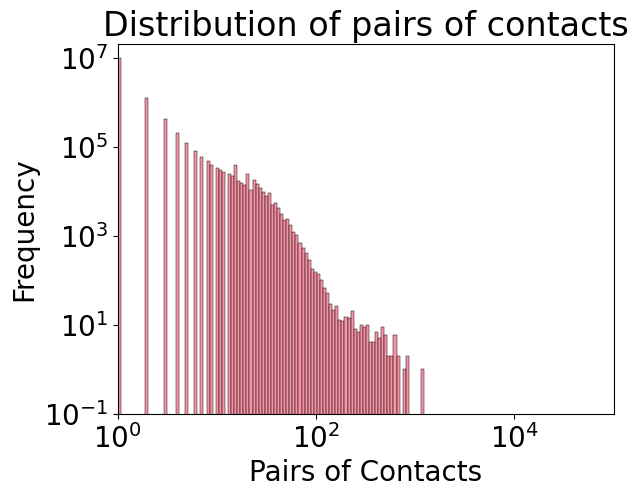

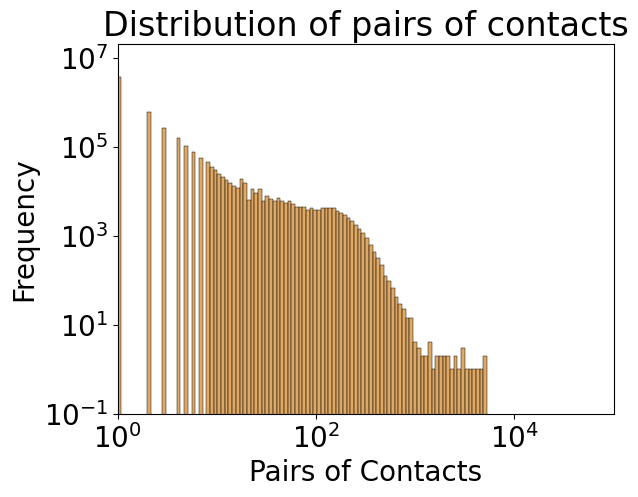

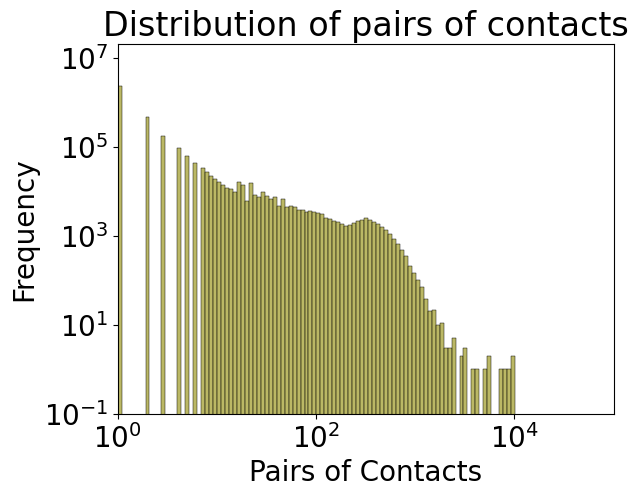

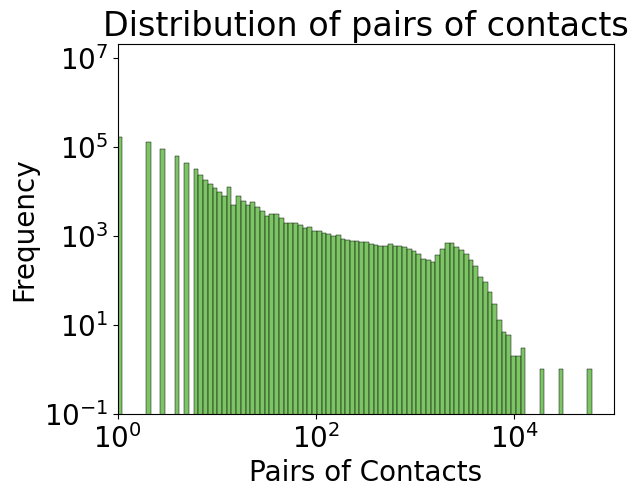

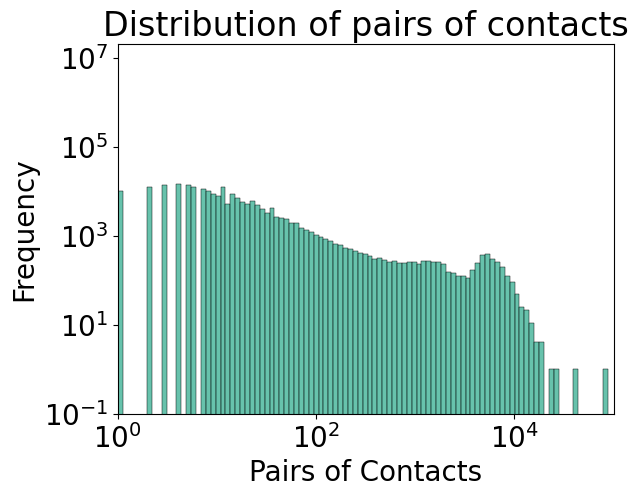

In [16]:
discretisation_steps = [10e3,5e4,10e4,5e5,10e5]
palette = sns.color_palette("husl", 9)

for i,step in enumerate(discretisation_steps[:]):
    step=int(step)
    #Plotting distribution of pairs of contacts

    # Read the text files into a DataFrame 
    df = pd.read_csv(f'/media/msbb/ssd2/Yasmine_copy/BULK_HIC/06-pairs/{step}/SRR20102070_1/SRR20102070_1_all.pairs.txt', delimiter='\t')  
    sns.histplot(df['pairs_of_contacts'], kde=False, bins=100, log_scale=(True,True), color=palette[i])  
    plt.xlim(1e0,1e5)
    plt.ylim(1e-1,2e7)
    
    
    # Set plot labels and title
    plt.xlabel('Pairs of Contacts')
    plt.ylabel('Frequency')
    
    plt.title(f'Stepsize ({int(step/1000)}kb)')
    plt.title('Distribution of pairs of contacts')

    # Show the plot
    plt.savefig(f'/media/msbb/ssd2/Yasmine_copy/Bulk_Hic_pictures/{step}_Contacts_Pairs_distribution.png', dpi=600, bbox_inches='tight')
    plt.show()

## Dataframe for sample descriptions

In [16]:
# Dataframe containing all the names corresponding to the cell experiment
Cell_name= pd.read_csv('Fastq_names_organized.csv')
Cell_name.sort_index(axis=1)
print(Cell_name)

    Sample_name                                    Description
0   SRR20102091          Human hMDMs cells infected by H37Rv_1
1   SRR20102094          Human hMDMs cells infected by H37Rv_2
2   SRR20102096          Human hMDMs cells infected by H37Rv_3
3   SRR20102098          Human hMDMs cells infected by H37Rv_4
4   SRR20102100  Human hMDMs cells infected by H37Rv_undecoded
5   SRR20102080                 Human hMDMs cells WT control_1
6   SRR20102082                 Human hMDMs cells WT control_2
7   SRR20102084                 Human hMDMs cells WT control_3
8   SRR20102086                 Human hMDMs cells WT control_4
9   SRR20102088         Human hMDMs cells WT control_undecoded
10  SRR20102059                            Thp1-M.tb-DLO-HiC_1
11  SRR20102064                            Thp1-M.tb-DLO-HiC_1
12  SRR20102061                            Thp1-M.tb-DLO-HiC_1
13  SRR20102070                            Thp1-M.tb-DLO-HiC_2
14  SRR20102066                            Thp1-M.tb-DL

## Comparing different stages 
Visualization of different stages of the THP1-macrophages. 

In [17]:
# setting values to rows and column variables 
rows = 4
columns = 3

# Reading images 
image_paths = [
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Monocyte_1_SRR20102037.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Monocyte_2_SRR20102039.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Monocyte_3_SRR20102041.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Monocyte_4_SRR20102043.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Macrophage_1_SRR20102045.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Macrophage_2_SRR20102049.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Macrophage_3_SRR20102053.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Macrophage_4_SRR20102057.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Macrophage_Mtb_1_SRR20102064.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Macrophage_Mtb_2_SRR20102066.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Macrophage_Mtb_3_SRR20102072.png',
    '/media/msbb/ssd2/Yasmine_copy/BULK_HIC/Comparing_graph/Hic_maps/Macrophage_Mtb_4_SRR20102078.png',
]

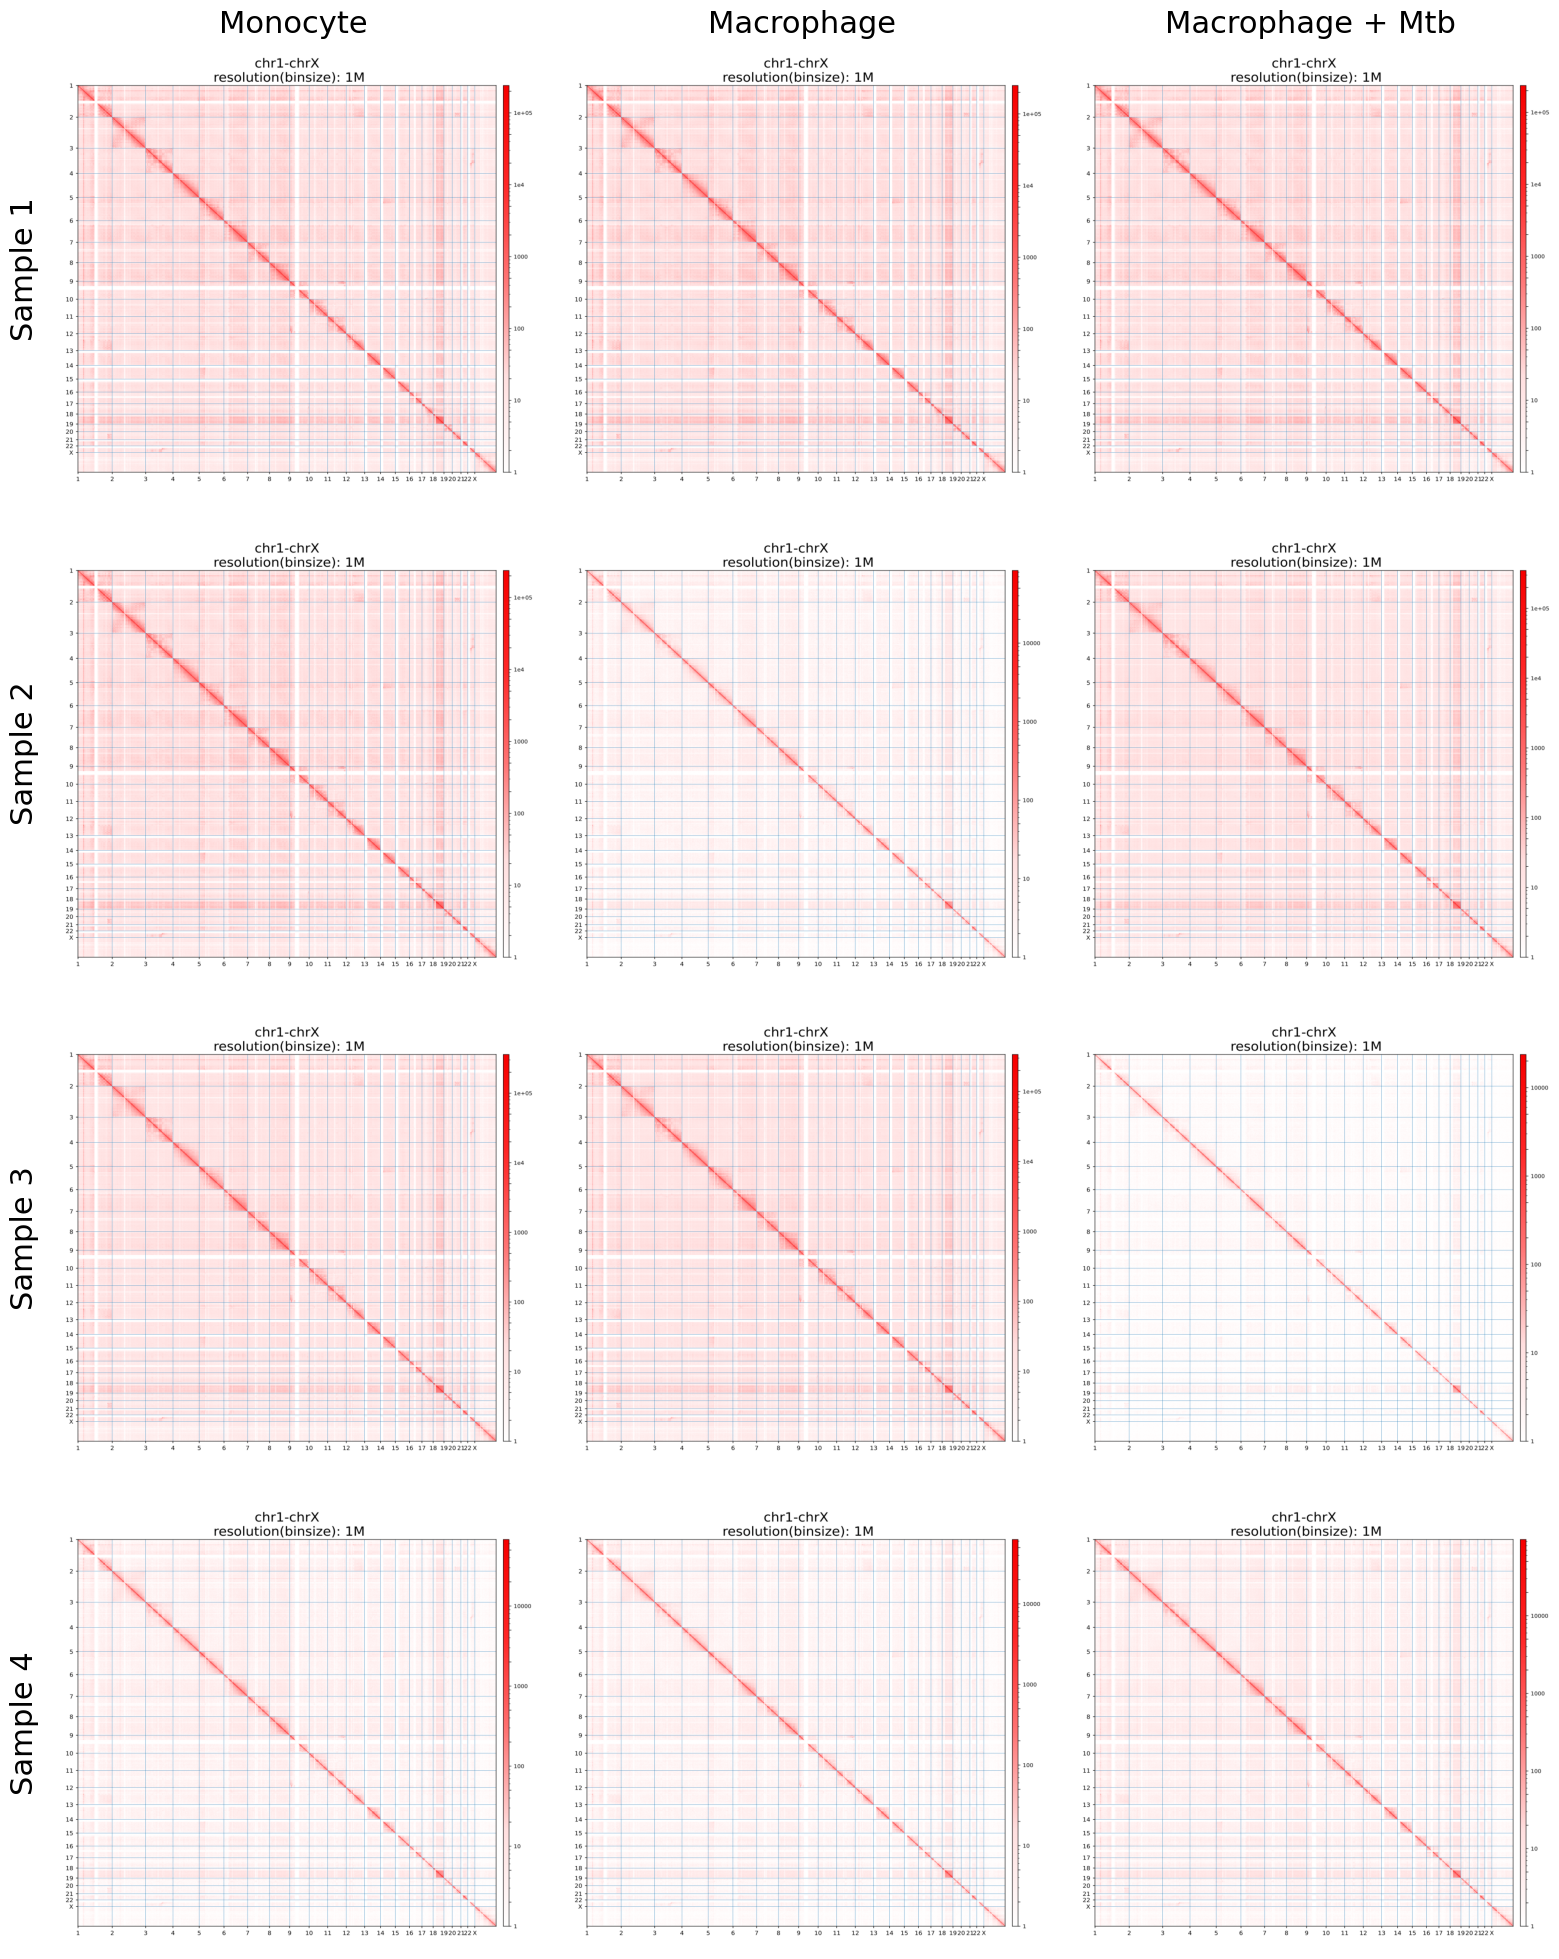

In [18]:
cols = ['Monocyte','Macrophage','Macrophage + Mtb']
rows = ['Sample {}'.format(row) for row in range(1,5)]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

iterator = 0
for row in range(len(axes[:,0])):
    for col in range(len(axes[0])):
        if os.path.isfile(image_paths[iterator]):
            img = np.asarray(Image.open(image_paths[iterator]))
            axes[row, col].imshow(img,aspect='auto')
            # axes[row, col].set_axis_off()
            
            # Turn off tick labels
            axes[row, col].set_yticklabels([])
            axes[row, col].set_xticklabels([])
            axes[row, col].spines['top'].set_visible(False)
            axes[row, col].spines['right'].set_visible(False)
            axes[row, col].spines['bottom'].set_visible(False)
            axes[row, col].spines['left'].set_visible(False)
            # Hide X and Y axes label marks
            axes[row, col].xaxis.set_ticks_position('none')
            axes[row, col].yaxis.set_ticks_position('none')
            
        else: None
        iterator+=1
        
for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize=22)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, fontsize=22)
    #ax.set_ylabel(row, rotation=90, size='large')
fig.tight_layout()

plt.savefig('/media/msbb/ssd2/Yasmine_copy/BULK_HIC_Mono_Macro_Mtb.png')
plt.show()